### Ejercicio 2: Simulación de una red de Hopfield con ruido

En este caso se busco simular la dinámica de una red de Hopfield con ruido usando la regla:  

$$
P(s_i(t + 1) = \pm 1) = \frac{\exp(\pm \beta h_i(t))}{\exp(\beta h_i(t)) + \exp(-\beta h_i(t))}
$$

donde:  
$$
h_i(t) = \sum_{j=1}^N w_{ij} s_j(t).
$$

Se tomó como condición inicial cada uno de los patrones ( $x_i^\mu$ ). Se recorrio toda la red aplicando esta regla. Después de visitar cada sitio 10 veces, se calculo el *overlap*. Se tomo:
- $N = 4000$,
- $p = 40$

Se grafico el *overlap* medio y la desviación estándar en función de la temperatura.


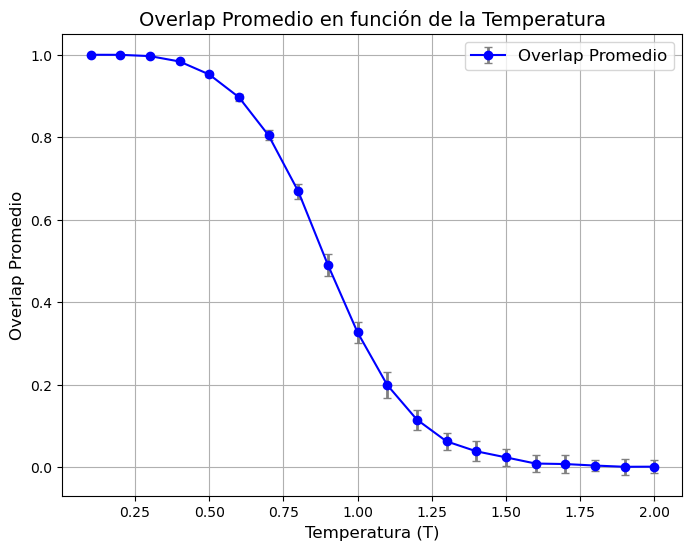

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def activation_probability(beta, local_field):
    """Calculate the probability of neuron activation."""
    b_hi = beta * local_field
    return np.exp(b_hi) / (np.exp(b_hi) + np.exp(-b_hi))

def initialize_patterns(num_patterns, num_neurons):
    """Generate random patterns of +1/-1."""
    return np.random.choice([-1, 1], size=(num_patterns, num_neurons))

def compute_weights(patterns, num_neurons):
    """Compute the connection weights using the Hebbian rule."""
    weights = patterns.T @ patterns / num_neurons
    np.fill_diagonal(weights, 0)  # Remove self-connections
    return weights

def simulate_hopfield_dynamics(beta, patterns, weights, max_iterations=10):
    """Simulate the dynamics of the Hopfield network and calculate overlaps."""
    num_patterns, num_neurons = patterns.shape
    overlaps = np.zeros(num_patterns)
    
    for pattern_idx, pattern in enumerate(patterns):
        neurons = pattern.copy()  # Start from the given pattern
        
        for _ in range(max_iterations):
            local_field = neurons @ weights  # Calculate the local field for all neurons
            activation_probs = activation_probability(beta, local_field)
            neurons = np.where(np.random.uniform(size=num_neurons) < activation_probs, 1, -1)
        
        overlaps[pattern_idx] = np.dot(neurons, pattern) / num_neurons  # Calculate overlap
    
    return overlaps

def plot_average_overlap(temperatures, avg_overlaps, std_dist_overlaps):
    """Plot the average overlap as a function of temperature (T)."""
    plt.figure(figsize=(8, 6))
    # plt.plot(temperatures, avg_overlaps, marker='o', linestyle='-', color='b')
    
    plt.errorbar(temperatures, avg_overlaps, yerr=std_dist_overlaps, fmt='o-', color='b', 
                 ecolor='gray', elinewidth=2, capsize=3, label="Overlap Promedio")
    plt.title("Overlap Promedio en función de la Temperatura", fontsize=14)
    plt.xlabel("Temperatura (T)", fontsize=12)
    plt.ylabel("Overlap Promedio", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    
    # Save the plot to a file
    plt.savefig("average_overlap_vs_temperature.png")

    plt.show()


num_neurons = 4000
num_patterns = 40
temperatures = np.linspace(0.1, 2, 20)
average_overlaps = []
std_dist_overlaps = []

patterns = initialize_patterns(num_patterns, num_neurons)
weights = compute_weights(patterns, num_neurons)

for temp_idx, temperature in enumerate(temperatures):
    beta = 1 / temperature
    overlaps = simulate_hopfield_dynamics(beta, patterns, weights)
    
    # Save overlap data to a file
    file_name = f"overlap_temp_{temperature:.2f}.txt"
    np.savetxt(file_name, overlaps)
    
    # Store average overlap for plotting
    average_overlaps.append(np.mean(overlaps))
    std_dist_overlaps.append(np.std(overlaps))

# Plot the results
plot_average_overlap(temperatures, average_overlaps, std_dist_overlaps)

